# Movie critics

In [20]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_excel("./Dataset/CSM_dataset.xlsx").set_axis([i for i in range(14)], axis = 1 )
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [22]:
one_hot = pd.get_dummies(data[0]).astype(int)
data.drop(0 , axis=1)
data = data.join(one_hot)
data = data.drop(0 , axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,When the Game Stands Tall,Whiplash,White God,Wild,Wild Tales,Winter's Tale,Wish I Was Here,Woman in Gold,X-Men: Days of Future Past,Yves Saint Laurent
0,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,...,0,0,0,0,0,0,0,0,0,0
1,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,...,0,0,0,0,0,0,0,0,0,0
2,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,...,0,0,0,0,0,0,0,0,0,0
3,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,...,0,0,0,0,0,0,0,0,0,0
227,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,...,0,0,0,0,0,0,0,0,0,0
228,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,...,0,0,0,0,0,0,0,0,0,0
229,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,...,0,0,0,0,0,0,0,0,0,0


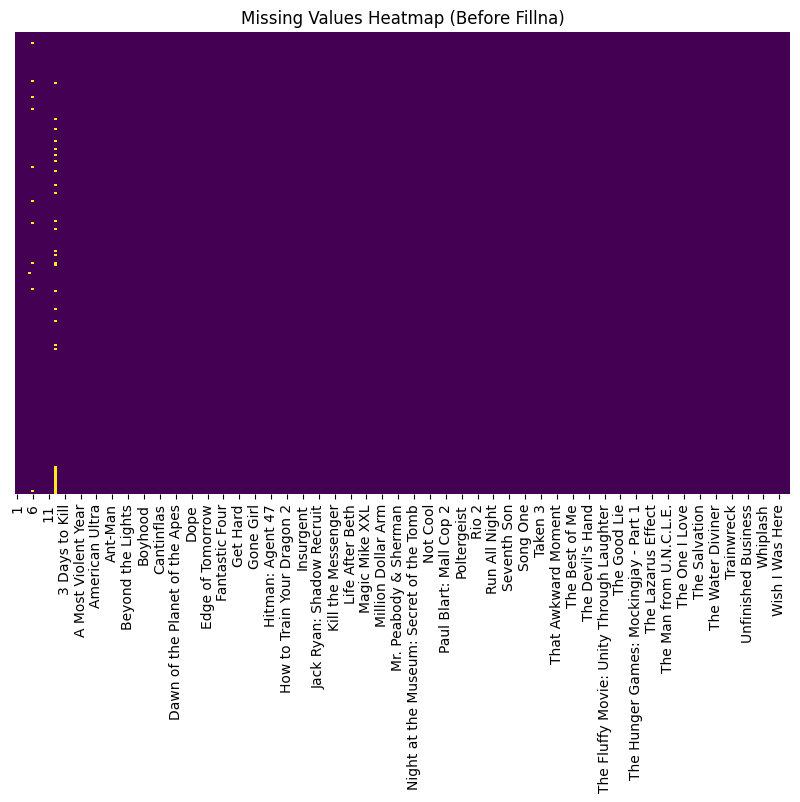

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap (Before Fillna)")
plt.show()

In [24]:
data.isna().sum()
for index in range(1 , 14):
     _avg = data[index].mean()
     data[index] = data[index].replace(math.nan , _avg)
data.isna().sum()

1                             0
2                             0
3                             0
4                             0
5                             0
                             ..
Winter's Tale                 0
Wish I Was Here               0
Woman in Gold                 0
X-Men: Days of Future Past    0
Yves Saint Laurent            0
Length: 244, dtype: int64

In [25]:
min_max_scaler = MinMaxScaler()
X = data[[i for i in range(1 , 14)]].values
X_scaled = min_max_scaler.fit_transform(X)

normalized = pd.DataFrame(X_scaled, columns=[i for i in range(1 , 14)] , index = data.index )
data[[i for i in range(1 , 14)]] = normalized

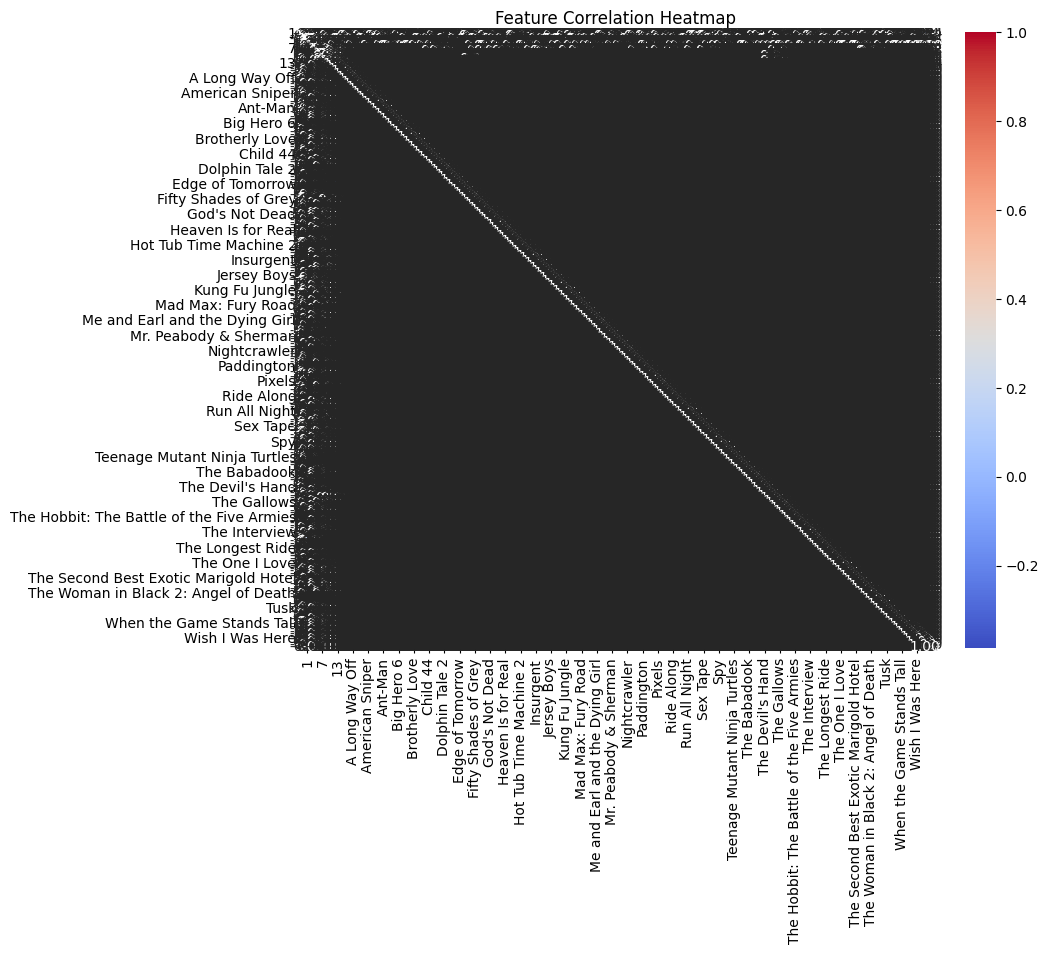

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
X = np.array(data)
Y = np.array(data.pop(4))

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)


In [28]:
lr_gd = SGDRegressor(max_iter=500000, tol=0.0000001, verbose= 1)
lr_gd.fit(X_train , Y_train)
score = lr_gd.score(X_test , Y_test)
print(score)
pred = lr_gd.predict(X_test)

mse = mean_squared_error(Y_test, pred)
mse

-- Epoch 1
Norm: 0.06, NNZs: 197, Bias: 0.034913, T: 184, Avg. loss: 0.010625
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 197, Bias: 0.036974, T: 368, Avg. loss: 0.008233
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 197, Bias: 0.036428, T: 552, Avg. loss: 0.007621
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 197, Bias: 0.034497, T: 736, Avg. loss: 0.007208
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.10, NNZs: 197, Bias: 0.032382, T: 920, Avg. loss: 0.006872
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.11, NNZs: 197, Bias: 0.030140, T: 1104, Avg. loss: 0.006578
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 197, Bias: 0.028055, T: 1288, Avg. loss: 0.006324
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.12, NNZs: 197, Bias: 0.025311, T: 1472, Avg. loss: 0.006092
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.13, NNZs: 197, Bias: 0.023296, T: 1656, Avg. loss: 0.005888
Total training

0.0008021743820247923

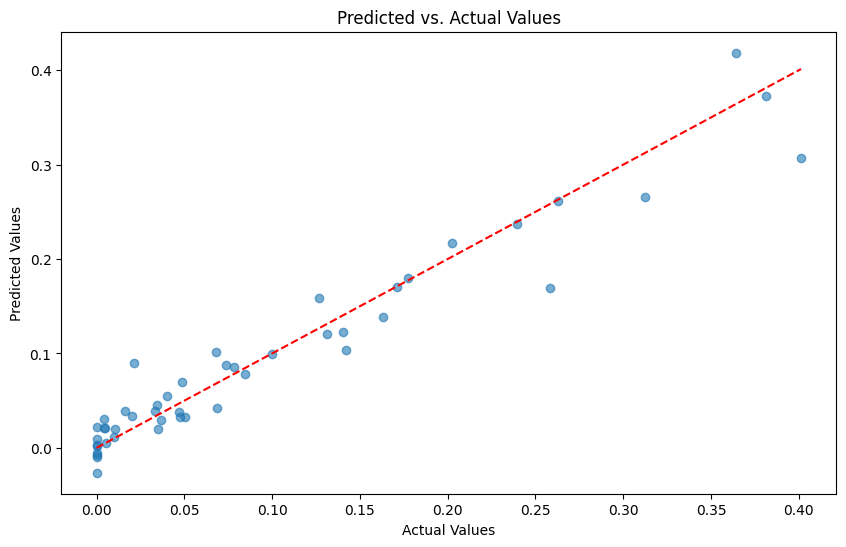

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()


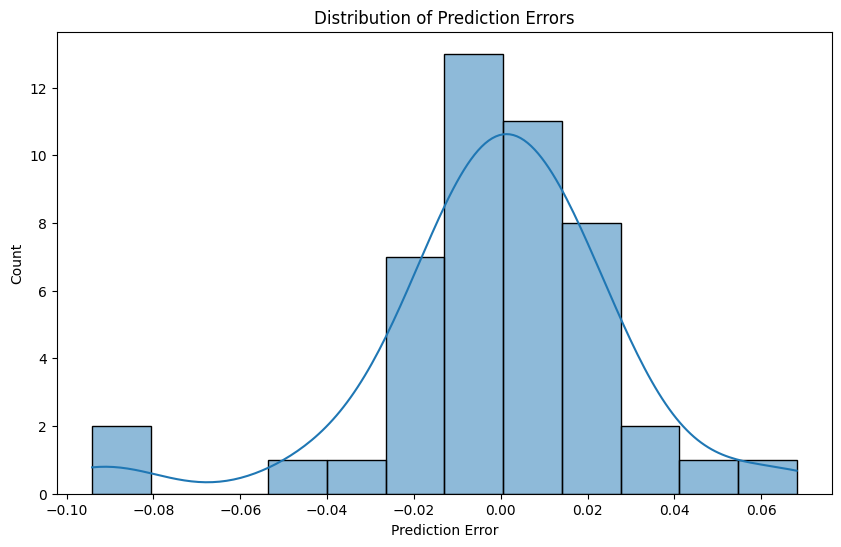

In [31]:
errors = pred - Y_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.show()